In [1]:
# Importing the required modules
!pip install catboost

     |████████████████████████████████| 76.3 MB 64 kB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/PW22RBA01 Capstone Project/Phase2/AP Data Analysis/With Indices/NDWI/Cleaned_Soil.csv')
# Importing the dataset
# df = pd.read_csv('Cleaned_Soil.csv')

Mounted at /content/drive


In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'West Godavari']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
4235,4238,16.61,81.38,West Godavari,Akividu,Akividu,Black Clay,7.66,3.71,0.67,30.83,274.0,2287.0,1021.0,493.53,1.70,3.14,53.18,15.10,12.62,0.024055,0.018218,0.142907,0.073182,-0.035299,Paddy
4236,4239,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.54,2.44,0.55,20.58,252.0,2272.0,1006.0,417.53,0.82,3.79,78.44,9.98,17.40,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy
4237,4240,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.37,3.55,0.82,35.71,264.0,2610.0,1028.0,543.49,1.28,3.61,87.14,16.42,29.72,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy
4238,4241,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.21,1.77,0.70,35.64,206.0,2363.0,995.0,348.31,1.78,2.79,100.70,14.76,26.42,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy
4239,4242,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.66,2.85,0.67,37.69,290.0,2177.0,1054.0,421.68,0.80,4.74,68.50,14.62,24.04,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,7.047061,1.219904,0.52770,29.210224,159.092652,1400.006390,518.782748,199.571661,1.465879,2.032524,69.261086,7.465208,18.538818,0.258498
std,0.851788,1.209212,0.28375,25.089836,96.045634,822.900136,400.421594,226.740241,1.860245,1.508240,60.967097,6.403115,11.707530,0.127372
min,4.450000,0.010000,0.03000,1.180000,16.000000,86.000000,5.000000,0.810000,0.050000,0.130000,0.070000,0.070000,0.040000,0.127583
25%,6.520000,0.110000,0.26000,11.110000,74.000000,595.000000,111.000000,6.180000,0.580000,0.560000,21.980000,1.130000,10.480000,0.168961
50%,7.240000,1.050000,0.50000,21.340000,133.000000,1410.000000,517.000000,159.000000,0.980000,1.950000,52.560000,6.320000,16.240000,0.191894
75%,7.650000,2.100000,0.76000,40.580000,233.000000,2216.000000,930.000000,342.750000,1.580000,3.210000,99.430000,14.180000,23.470000,0.359046
max,8.700000,5.860000,1.21000,152.440000,611.000000,3969.000000,1171.000000,1505.090000,18.600000,6.440000,314.900000,20.180000,86.660000,0.697109


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black Clay', 'Black Clay ', 'Clay', 'Black', 'Light Broiwn',
       'Red Sandy', 'Red Sandy Loam', 'Brown', 'Red', 'Sandy',
       'Clay Sandy', 'Black ', 'Brown Clay', 'Brown Light', 'Brown ',
       'Light Brown', 'Sandy Loam', 'Broan Clay', 'Red  Sandy',
       'Brown Dark', 'Red Sandy '], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black Clay', 'Black Clay '], 'Black Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Clay'], 'Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Black ', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Light Broiwn ', 'Brown Light', 'Light Brown', 'Light Broiwn'], 'Light Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown', 'Brown ', 'Brown Dark'], 'Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown Clay', 'Broan Clay'], 'Brown Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'Red  Sandy', 'Red Sandy '], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red Sandy Loam', 'Red Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Clay Sandy', 'Sandy Clay Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Sandy Loam', 'Sandy Loam Soil')
df.SoilType.unique()

array(['Black Clay Soil', 'Clay Soil', 'Black Soil', 'Light Brown Soil',
       'Red Sandy Soil', 'Red Sandy Loam Soil', 'Brown Soil', 'Red Soil',
       'Sandy Soil', 'Sandy Clay Soil', 'Brown Clay Soil',
       'Sandy Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Clay Soil': 173,
 'Black Soil': 37,
 'Brown Clay Soil': 5,
 'Brown Soil': 33,
 'Clay Soil': 5,
 'Light Brown Soil': 30,
 'Red Sandy Loam Soil': 5,
 'Red Sandy Soil': 7,
 'Red Soil': 12,
 'Sandy Clay Soil': 1,
 'Sandy Loam Soil': 4,
 'Sandy Soil': 1}

<BarContainer object of 12 artists>

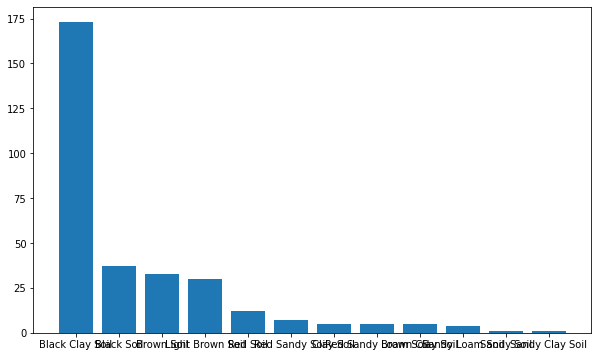

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy ', 'Paddy', 'Maize', 'Groundnut', 'Cashew', 'Oil Palm',
       'Coconut+ Banana', 'Coconut', 'Lime', 'Cocoa+ Coconut',
       'Sugar Cane', 'Mulberry', 'Coconut+Cocoa', 'Cocnut+Banana',
       'Oil Palm+Coconut', 'Mulberrry', 'Coconut+ Cocoa', 'Cane+Lime ',
       'Cocnut+Lime', 'Oil Palm ', 'Tobacco', 'Cane', 'Eucalyptus',
       'Mango', 'Red Sandal', 'Oil Palm+Banana', 'Sandal', 'Cashew+Maize',
       'Banana', 'Brinjal'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy               138
Paddy                47
Maize                44
Oil Palm             37
Lime                  9
Cashew                7
Coconut               5
Cane                  3
Eucalyptus            2
Coconut+ Banana       1
Brinjal               1
Sugar Cane            1
Banana                1
Coconut+Cocoa         1
Mango                 1
Mulberrry             1
Sandal                1
Mulberry              1
Oil Palm              1
Cashew+Maize          1
Cane+Lime             1
Cocoa+ Coconut        1
Tobacco               1
Groundnut             1
Oil Palm+Banana       1
Oil Palm+Coconut      1
Cocnut+Banana         1
Cocnut+Lime           1
Red Sandal            1
Coconut+ Cocoa        1
Name: Crop, dtype: int64

Paddy                         185
Maize                          52
OilPalm + Coconut + Banana     52
SugarCane                      14
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

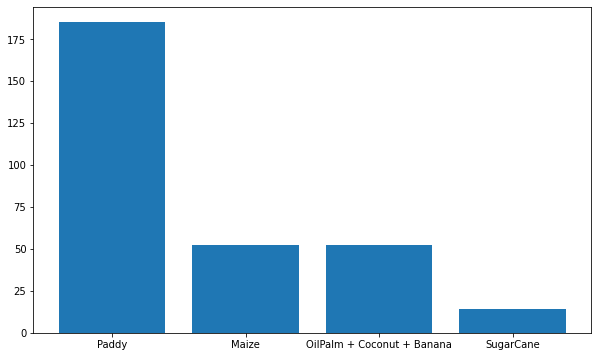

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy ', 'Paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace('Paady', 'Paddy')
df['Crop'] = df['Crop'].replace('Oil Palm', 'OilPalm')
df['Crop'] = df['Crop'].replace(['Coconut', 'Coconut+ Banana', 'Cocoa+ Coconut', 'Coconut+Cocoa', 'Cocnut+Banana', 'Coconut+ Cocoa', 'Cocnut+Lime'], 'Coconut')
df['Crop'] = df['Crop'].replace(['OilPalm', 'Coconut', 'Oil Palm+Coconut', 'Oil Palm ', 'Oil Palm+Banana', 'Banana'], 'OilPalm + Coconut + Banana')
df['Crop'] = df['Crop'].replace(['Cashew', 'Cashew+Maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Cane+Lime ', 'Lime', 'Cane', 'Sugar Cane'], 'SugarCane')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Brinjal') & (df['Crop'] != 'Sandal') & (df['Crop'] != 'Red Sandal') & (df['Crop'] != 'Mango') & (df['Crop'] != 'Eucalyptus') & (df['Crop'] != 'Tobacco') & (df['Crop'] != 'Mulberrry') & (df['Crop'] != 'Mulberry')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.265128,-0.007376,0.071154,0.335927,0.330180,0.311368,0.195464,-0.041114,0.325979,-0.184313,0.097448,-0.326562,0.099727
EC,0.265128,1.000000,0.618774,0.531399,0.609634,0.658226,0.773301,0.896447,0.309252,0.843697,0.440366,0.685738,0.032399,0.318265
OC,-0.007376,0.618774,1.000000,0.692562,0.466257,0.619471,0.649804,0.618853,0.517313,0.609047,0.805941,0.809661,0.335071,0.321784
P,0.071154,0.531399,0.692562,1.000000,0.508427,0.381387,0.427702,0.576944,0.414544,0.499417,0.642009,0.584928,0.186620,0.167226
K,0.335927,0.609634,0.466257,0.508427,1.000000,0.577818,0.644379,0.634508,0.180731,0.694782,0.316391,0.596825,0.067216,0.291862
Ca,0.330180,0.658226,0.619471,0.381387,0.577818,1.000000,0.912366,0.650816,0.121050,0.731598,0.381731,0.822074,0.084419,0.512697
Mg,0.311368,0.773301,0.649804,0.427702,0.644379,0.912366,1.000000,0.705222,0.141034,0.853073,0.423422,0.889638,0.079142,0.547404
S,0.195464,0.896447,0.618853,0.576944,0.634508,0.650816,0.705222,1.000000,0.314794,0.795320,0.491456,0.664093,0.102953,0.306200
Zn,-0.041114,0.309252,0.517313,0.414544,0.180731,0.121050,0.141034,0.314794,1.000000,0.228145,0.496443,0.263753,0.128532,-0.058641
B,0.325979,0.843697,0.609047,0.499417,0.694782,0.731598,0.853073,0.795320,0.228145,1.000000,0.454374,0.744184,0.045943,0.392881


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'P', 'K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu', 'EVI']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'Mn', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC     Mn  ...  Sandy Clay Soil  Sandy Loam Soil  Sandy Soil
4235  7.66  3.71  12.62  ...                0                0           0

[1 rows x 15 columns]
4235    Paddy
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:3] = sc1.fit_transform(X[:, 0:3])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8026315789473685


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.98 %
Standard Deviation: 5.27 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8026315789473685


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.07 %
Standard Deviation: 7.60 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8289473684210527


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.13 %
Standard Deviation: 7.11 %


In [36]:
pickle.dump(clf3, open('WG_model.pkl', 'wb'))
pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7763157894736842


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.98 %
Standard Deviation: 5.20 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.9074889867841409
Testing Accuracy:  0.7894736842105263


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 88.08 %
Standard Deviation: 5.25 %


In [46]:
# pickle.dump(clf5, open('WG_model.pkl', 'wb'))
# pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# Catboost

In [47]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.5642402	total: 46.8ms	remaining: 4.63s
1:	learn: 0.4748144	total: 47.2ms	remaining: 2.31s
2:	learn: 0.4149018	total: 47.6ms	remaining: 1.54s
3:	learn: 0.4078797	total: 48ms	remaining: 1.15s
4:	learn: 0.3966994	total: 48.4ms	remaining: 919ms
5:	learn: 0.3536222	total: 48.7ms	remaining: 764ms
6:	learn: 0.3343769	total: 49.1ms	remaining: 652ms
7:	learn: 0.3323360	total: 49.4ms	remaining: 568ms
8:	learn: 0.3222810	total: 49.7ms	remaining: 503ms
9:	learn: 0.3108441	total: 50.1ms	remaining: 451ms
10:	learn: 0.3011107	total: 50.7ms	remaining: 410ms
11:	learn: 0.2930370	total: 51.2ms	remaining: 376ms
12:	learn: 0.2831532	total: 51.8ms	remaining: 347ms
13:	learn: 0.2812729	total: 52.6ms	remaining: 323ms
14:	learn: 0.2765490	total: 53.2ms	remaining: 301ms
15:	learn: 0.2634654	total: 53.8ms	remaining: 282ms
16:	learn: 0.2602696	total: 54.3ms	remaining: 265ms
17:	learn: 0.2564392	total: 54.9ms	remaining: 250ms
18:	learn: 0.2531635	total: 55.4ms	remaining: 236ms
19:	learn: 0.2475110	tot

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5164756698
bestIteration = 99

Training on fold [1/5]

bestTest = 0.4445836707
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5317352543
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4853893297
bestIteration = 99

Training on fold [4/5]

bestTest = 0.4131492387
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
2:	learn: 1.2680253	total: 3.3ms	remaining: 1.1s
3:	learn: 1.2397243	total: 4.34ms	remaining: 1.08s
4:	learn: 1.2089657	total: 5.23ms	remaining: 1.04s
5:	learn: 1.1746427	total: 6.37ms	remaining: 1.05s
6:	learn: 1.1425204	total: 7.24ms	remaining: 1.03s
7:	learn: 1.1149882	total: 8.11ms	remaining: 1s
8:	learn: 1.0874239	total: 8.99ms	remaining: 990ms
9:	learn: 1.0614906	total: 9.83ms	remaining: 973ms
10:	learn: 1.0391170	total: 10.7ms	remaining: 959ms
11:	learn: 1.0159170	total: 11.5ms	remaining: 946ms
12:	learn: 0.9945223	total: 12.3ms	remaining: 933ms
13:	learn: 0.9747445	total: 13.1ms	remaining: 923ms
14:	learn: 0.9544876	total: 13.9ms	remaining: 916ms
15:	learn: 0.9358288	total: 14.8ms	remaining: 913ms
16:	learn: 0.9186179	total: 15.7ms	remaining: 907ms
17:	learn: 0.9005973	total: 16.5ms	remaining: 900ms
18:	learn: 0.8833022	total: 17.3ms	remaining: 894ms
19:	learn: 0.8660333	total: 18.1ms	remaining: 888ms
20:	learn: 0.8521646	total